# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url +"tokyo").json()
response

{'coord': {'lon': 139.69, 'lat': 35.69},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 59.5,
  'feels_like': 47.23,
  'temp_min': 57.99,
  'temp_max': 60.8,
  'pressure': 1017,
  'humidity': 51},
 'visibility': 10000,
 'wind': {'speed': 18.34, 'deg': 350},
 'clouds': {'all': 75},
 'dt': 1603993360,
 'sys': {'type': 1,
  'id': 8074,
  'country': 'JP',
  'sunrise': 1604005272,
  'sunset': 1604044106},
 'timezone': 32400,
 'id': 1850144,
 'name': 'Tokyo',
 'cod': 200}

In [33]:
cloudiness = []
country = []
date = []
humidity = []
lng = []
lat = []
max_temp = []
wind = []
final_city = []
counter = 1
set_ = 1

print("------------------------")
print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    try:
        target_city=city
        target_url = f"{url}appid={weather_api_key}&units={units}&q={target_city}"
        response=requests.get(target_url).json()
        final_city.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        
        print(f"Processing Record {counter} of Set {set_} | {city}")
        
        if counter %50==0:
            set_ = set_ + 1
            counter = 0
        
        counter = counter + 1
        
    except:
        print("City not found. Skipping...")
        pass
    
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

------------------------
Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | dunedin
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | ndele
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | nioki
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | jinchang
Processing Record 11 of Set 1 | komsomolskiy
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | lata
Processing Record 14 of Set 1 | la trinidad
Processing Record 15 of Set 1 | bouna
Processing Record 16 of Set 1 | okha
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | comodoro rivadavia
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | angoche
Processing Record 22 of Set 1 | kruisfontein
Processing Record 23 of Set 1 | 

Processing Record 37 of Set 4 | saint-pierre
Processing Record 38 of Set 4 | cayenne
Processing Record 39 of Set 4 | saskylakh
Processing Record 40 of Set 4 | geraldton
Processing Record 41 of Set 4 | binga
Processing Record 42 of Set 4 | carnarvon
City not found. Skipping...
City not found. Skipping...
Processing Record 43 of Set 4 | kochubey
Processing Record 44 of Set 4 | hambantota
Processing Record 45 of Set 4 | klaksvik
Processing Record 46 of Set 4 | esperance
Processing Record 47 of Set 4 | islamkot
Processing Record 48 of Set 4 | bathsheba
Processing Record 49 of Set 4 | sola
Processing Record 50 of Set 4 | ribeira grande
Processing Record 1 of Set 5 | constitucion
Processing Record 2 of Set 5 | kattivakkam
Processing Record 3 of Set 5 | nakusp
Processing Record 4 of Set 5 | sabzevar
Processing Record 5 of Set 5 | sorong
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | laguna
Processing Record 8 of Set 5 | mahebourg
City not found. Skipping...
Proc

City not found. Skipping...
Processing Record 24 of Set 8 | valparaiso
Processing Record 25 of Set 8 | herat
Processing Record 26 of Set 8 | paralimni
Processing Record 27 of Set 8 | zhigansk
Processing Record 28 of Set 8 | namibe
Processing Record 29 of Set 8 | minna
Processing Record 30 of Set 8 | alofi
Processing Record 31 of Set 8 | nizhniy baskunchak
Processing Record 32 of Set 8 | porto novo
Processing Record 33 of Set 8 | katsuura
Processing Record 34 of Set 8 | taoudenni
Processing Record 35 of Set 8 | dubbo
City not found. Skipping...
Processing Record 36 of Set 8 | labuhan
Processing Record 37 of Set 8 | isiro
Processing Record 38 of Set 8 | nome
Processing Record 39 of Set 8 | awjilah
Processing Record 40 of Set 8 | hobyo
Processing Record 41 of Set 8 | nanortalik
Processing Record 42 of Set 8 | luangwa
Processing Record 43 of Set 8 | chicama
Processing Record 44 of Set 8 | allanridge
Processing Record 45 of Set 8 | kibala
Processing Record 46 of Set 8 | nelson bay
Processin

City not found. Skipping...
Processing Record 12 of Set 12 | mouila
Processing Record 13 of Set 12 | kyzyl-suu
Processing Record 14 of Set 12 | oum hadjer
Processing Record 15 of Set 12 | kang
Processing Record 16 of Set 12 | srednekolymsk
Processing Record 17 of Set 12 | chapais
Processing Record 18 of Set 12 | leh
Processing Record 19 of Set 12 | zhezkazgan
Processing Record 20 of Set 12 | sambava
Processing Record 21 of Set 12 | prince george
Processing Record 22 of Set 12 | dublin
Processing Record 23 of Set 12 | puerto narino
Processing Record 24 of Set 12 | yatou
Processing Record 25 of Set 12 | toul
Processing Record 26 of Set 12 | bahar
Processing Record 27 of Set 12 | arman
Processing Record 28 of Set 12 | halifax
Processing Record 29 of Set 12 | sidney
Processing Record 30 of Set 12 | mozelos
Processing Record 31 of Set 12 | clyde river
Processing Record 32 of Set 12 | primero de enero
------------------------
Data Retrieval Complete
------------------------


In [5]:
weather_df=pd.DataFrame({"City":final_city,
                        "Cloudiness": cloudiness,
                        "Country": country,
                        "Date": date,
                        "Humidity": humidity,
                        "Lat": lat,
                        "Long": lng,
                        "Max Temp": max_temp,
                        "Wind Speed": wind})

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df.to_csv(output_data_file)

In [7]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Dunedin,54,NZ,1603993480,93,-45.87,170.50,53.01,8.01
1,Butaritari,68,KI,1603993480,77,3.07,172.79,81.73,12.57
2,Bluff,86,NZ,1603992926,91,-46.60,168.33,52.00,3.00
3,Castro,100,BR,1603993480,59,-24.79,-50.01,71.15,12.06
4,Ndélé,88,CF,1603993480,53,8.41,20.65,78.35,2.08


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_df["Humidity"] = pd.to_numeric(weather_df["Humidity"])

humidity_df = weather_df.loc[weather_df["Humidity"] > 100]

In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

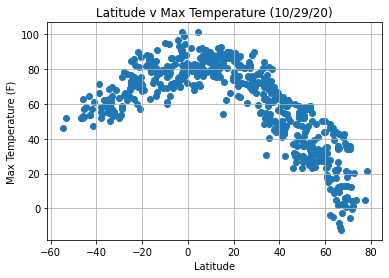

In [11]:
x=weather_df['Lat']
y=weather_df['Max Temp']

plt.scatter(x,y, marker='o')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('Latitude v Max Temperature (10/29/20)')
plt.grid()

plt.savefig("Latitude v Max Temperature.png")
plt.show()

The Latitude v Max Temperature scatterplot shows that as the temperature approaches zero from both the negative and positive latitude, max temperature increases.

## Latitude vs. Humidity Plot

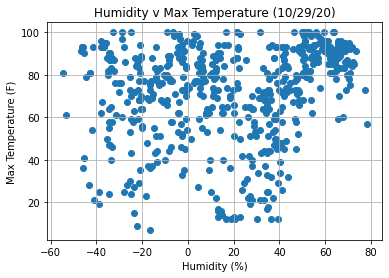

In [12]:
x=weather_df['Lat']
y=weather_df['Humidity']

plt.scatter(x,y, marker='o')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Humidity (%)')
plt.title('Humidity v Max Temperature (10/29/20)')
plt.grid()

plt.savefig("Latitude v Humidity.png")
plt.show()

The Humidity v Max Temperature plot shows there is not much of a correlation between humidity and max temperature.

## Latitude vs. Cloudiness Plot

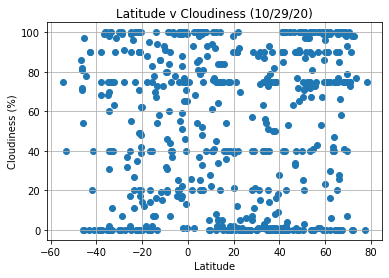

In [13]:
x=weather_df['Lat']
y=weather_df['Cloudiness']

plt.scatter(x,y, marker='o')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude v Cloudiness (10/29/20)')
plt.grid()

plt.savefig("Latitude v Cloudiness.png")
plt.show()

The Latitude v Cloudiness scatterplot shows no correlation between latitude and cloudiness. There seems to be more latitude points specifically at the 100%, ~75%, 40%, and 0% cloudiness. 

## Latitude vs. Wind Speed Plot

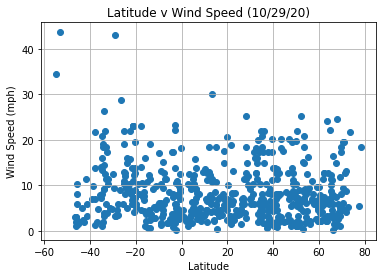

In [14]:
x=weather_df['Lat']
y=weather_df['Wind Speed']

plt.scatter(x,y, marker='o')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude v Wind Speed (10/29/20)')
plt.grid()

plt.savefig("Latitude v Wind Speed.png")
plt.show()

The Latitude v Wind speed scatterplot shows no correlation between latitude and wind speed.

## Linear Regression

In [15]:
#Northern and Southern hemispheres
weather_df["Lat"] = pd.to_numeric(weather_df["Lat"])

northern_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_df = weather_df.loc[weather_df["Lat"] < 0]

southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Dunedin,54,NZ,1603993480,93,-45.87,170.50,53.01,8.01
2,Bluff,86,NZ,1603992926,91,-46.60,168.33,52.00,3.00
3,Castro,100,BR,1603993480,59,-24.79,-50.01,71.15,12.06
7,Nioki,17,CD,1603993481,91,-2.72,17.68,74.10,3.91
16,Ushuaia,75,AR,1603993232,81,-54.80,-68.30,46.40,34.45
...,...,...,...,...,...,...,...,...,...
561,Mouila,77,GA,1603993608,91,-1.87,11.06,75.81,3.58
564,Kang,27,BW,1603993609,15,-23.68,22.79,85.96,5.10
569,Sambava,7,MG,1603993610,83,-14.27,50.17,73.87,12.28
572,Puerto Nariño,75,CO,1603993610,67,-3.77,-70.38,93.20,8.05


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8836518221954276


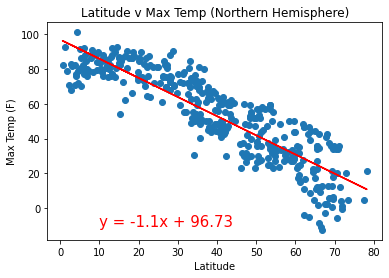

In [16]:
northern_lat = northern_df["Lat"]
northern_temp = northern_df["Max Temp"]

n_slope, n_int, n_r, n_p, n_std_err = stats.linregress(northern_lat, northern_temp)
n_fit = n_slope * northern_lat + n_int
line_eq = "y = " + str(round(n_slope,2)) + "x + " + str(round(n_int,2))

plt.scatter(northern_lat,northern_temp)
plt.plot(northern_lat,n_fit,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.title('Latitude v Max Temp (Northern Hemisphere)')

print(f"The r-value is: {n_r}")

plt.savefig("Latitude vs Max Temp (Northern Hemisphere).png")
plt.show()

The northern hemisphere Latitude v Max Temp scatterplot and line regression show a strong negative correlation: as latitude goes farther from the equator, max temperature decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7668953627957694


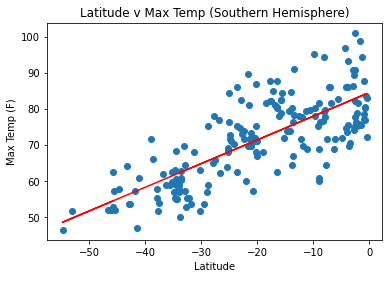

In [17]:
southern_lat = southern_df["Lat"]
southern_temp = southern_df["Max Temp"]

s_slope, s_int, s_r, s_p, s_std_err = stats.linregress(southern_lat, southern_temp)
s_fit = s_slope * southern_lat + s_int
line_eq = "y = " + str(round(n_slope,2)) + "x + " + str(round(n_int,2))

plt.scatter(southern_lat, southern_temp)
plt.plot(southern_lat,s_fit,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.title('Latitude v Max Temp (Southern Hemisphere)')

print(f"The r-value is: {s_r}")

plt.savefig("Latitude vs Max Temp (Southern Hemisphere).png")
plt.show()

The southern hemisphere Latitude v Max Temp scatterplot and line regression show a somewhat strong positive correlation: as latitude gets closer to the equator, max temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.37204543556340597


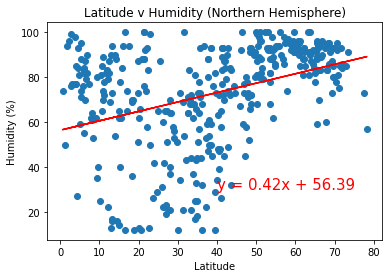

In [18]:
northern_lat = northern_df["Lat"]
northern_humidity = northern_df["Humidity"]

nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(northern_lat, northern_humidity)
nh_fit = nh_slope * northern_lat + nh_int
line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))

plt.scatter(northern_lat,northern_humidity)
plt.plot(northern_lat,nh_fit,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude v Humidity (Northern Hemisphere)')

print(f"The r-value is: {nh_r}")

plt.savefig("Latitude vs Max Temp (Northern Hemisphere).png")
plt.show()

The northern hemisphere latitude v humidity scatterplot and line regression show a weak positive correlation between latitude and humidity: as latitude goes further from the equator, humidity tends to increase.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.042027463690863694


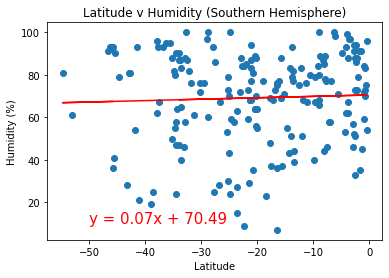

In [19]:
southern_lat = southern_df["Lat"]
southern_humidity = southern_df["Humidity"]

sh_slope, sh_int, sh_r, sh_p, sh_std_err = stats.linregress(southern_lat, southern_humidity)
sh_fit = sh_slope * southern_lat + sh_int
line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))

plt.scatter(southern_lat,southern_humidity)
plt.plot(southern_lat,sh_fit,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude v Humidity (Southern Hemisphere)')

print(f"The r-value is: {sh_r}")

plt.savefig("Latitude v Max Temp (Southern Hemisphere).png")
plt.show()

The southern hemisphere latitude v humidity scatterplot and line regression show almost no correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17243566503702834


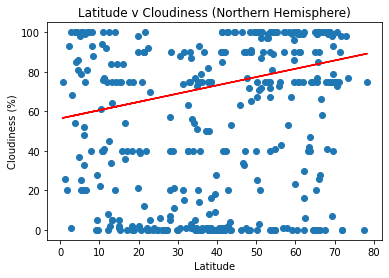

In [20]:
northern_lat = northern_df["Lat"]
northern_cloud = northern_df["Cloudiness"]

nc_slope, nc_int, nc_r, nc_p, nc_std_err = stats.linregress(northern_lat, northern_cloud)
nc_fit = nh_slope * northern_lat + nc_int
line_eq = "y = " + str(round(nc_slope,2)) + "x + " + str(round(nc_int,2))

plt.scatter(northern_lat,northern_cloud)
plt.plot(northern_lat,nh_fit,"r-")
plt.annotate(line_eq,(-10,-10),fontsize=15,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude v Cloudiness (Northern Hemisphere)')

print(f"The r-value is: {nc_r}")

plt.savefig("Latitude v Cloudiness (Northern Hemisphere).png")
plt.show()

The northern hemisphere latitude v cloudiness scatterplot and line regression show almost no correlation between the two values.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06448704251866881


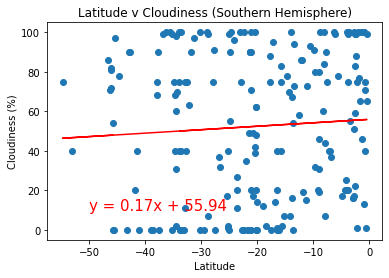

In [21]:
southern_lat = southern_df["Lat"]
southern_cloud = southern_df["Cloudiness"]

sc_slope, sc_int, sc_r, sc_p, sc_std_err = stats.linregress(southern_lat, southern_cloud)
sc_fit = sc_slope * southern_lat + sc_int
line_eq = "y = " + str(round(sc_slope,2)) + "x + " + str(round(sc_int,2))

plt.scatter(southern_lat,southern_cloud)
plt.plot(southern_lat,sc_fit,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude v Cloudiness (Southern Hemisphere)')

print(f"The r-value is: {sc_r}")

plt.savefig("Latitude v Cloudiness (Southern Hemisphere).png")
plt.show()

The southern hemisphere latitude v cloudiness scatterplot and line regression show almost no correlation between the two values.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04358150091000097


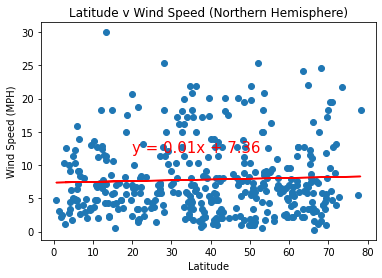

In [22]:
northern_lat = northern_df["Lat"]
northern_wind = northern_df["Wind Speed"]

nw_slope, nw_int, nw_r, nw_p, nw_std_err = stats.linregress(northern_lat, northern_wind)
nw_fit = nw_slope * northern_lat + nw_int
line_eq = "y = " + str(round(nw_slope,2)) + "x + " + str(round(nw_int,2))

plt.scatter(northern_lat,northern_wind)
plt.plot(northern_lat,nw_fit,"r-")
plt.annotate(line_eq,(20,12),fontsize=15,color="red")
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.title('Latitude v Wind Speed (Northern Hemisphere)')

print(f"The r-value is: {nw_r}")

plt.savefig("Latitude v Cloudiness (Northern Hemisphere).png")
plt.show()

The nothern hemisphere latitude v wind speed scatterplot and line regression shows almost no correlation between the two values.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.17704804480451464


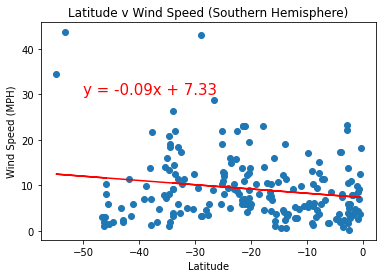

In [23]:
southern_lat = southern_df["Lat"]
southern_wind = southern_df["Wind Speed"]

sw_slope, sw_int, sw_r, sc_p, sw_std_err = stats.linregress(southern_lat, southern_wind)
sw_fit = sw_slope * southern_lat + sw_int
line_eq = "y = " + str(round(sw_slope,2)) + "x + " + str(round(sw_int,2))

plt.scatter(southern_lat,southern_wind)
plt.plot(southern_lat,sw_fit,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.title('Latitude v Wind Speed (Southern Hemisphere)')

print(f"The r-value is: {sw_r}")

plt.savefig("Latitude v Wind Speed (Southern Hemisphere).png")
plt.show()

The southern hemisphere latitude v wind speed scatterplot and line regression show almost no correlation.

## Analysis

Based on the data above, as latitude approaches the equator, temperature increases. There is no evidence of correlation between latitude and wind speed, humidity, or cloudiness. 